<a href="https://colab.research.google.com/github/Dietrich061991/Prevendo-Dados-com-Janelas-Deslizantes-usando-Python/blob/master/Prevendo_Dados_com_Janelas_Deslizantes_usando_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevendo Dados com Janelas Deslizantes usando Python

Você vai aprender como fazer Walk-Forward. Walk-forward significa "andar para a frente"  iremos aplicar isso com um modelo de médias móveis para prever vendas. Você pode aplicar em qualquer modelo, seja usando Machine Learning ou métodos estatísticos. Independente de qual seja o seu modelo, esta técnica irá permitir você treinar e testar os dados a medida que avança na linha do tempo.

**Médias** **Móveis** (**Average** **Moving** **Smoothing**)




*   Valor médio de valores em uma sequência de tempo.
*   Objetivo é remover ruídos e fazer previsões.
*   Pode ser usado para Feature Engineering.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# importando as bibliotecas que serão usadas
import pandas as pd
from matplotlib import pyplot
import matplotlib as plt


Esse dataset possui as vendas mensais de champanhe de janeiro de 1964 a setembro de 1972.

– **header=0** –> significa que essa será a linha usada como nome da coluna e início dos dados.

– **index_col=0** –> declaramos explicitamente para tratar a primeira coluna como o índice nesse caso a coluna que possui datas.

– **parse_dates=True** –> para que os dados de data sejam analisados.

– **squeeze=True** –> para os dados analisados retornarem uma série do pandas.

In [0]:
df =  pd.read_csv ('/content/drive/My Drive/Data science/champagne.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
df.head(5)

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

**Vamos visualizar esses dados através de um gráfico** 

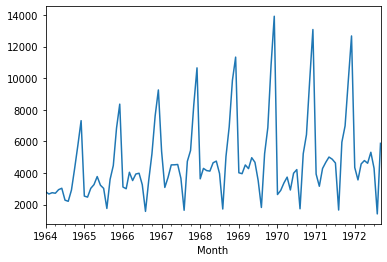

In [0]:
# Plotando o gráfico:
df.plot()

**Rolling**
O método rolling é uma forma de se trabalhar com os dados no nível de janela, esse método cria um objeto baseado em um tamanho específico que nos definimos.

Esse objeto agrupa uma porção dos dados e com isso conseguimos calcular uma estatística como a média por exemplo.

In [0]:
# vamos criar um objeto rolling de janela igual a 3
rolling = df.rolling(window=3)

In [0]:
print(rolling)

Rolling [window=3,center=False,axis=0]


**Em seguida vamos calcular a media da janela que acabamos de calcular**

In [0]:
# Calcula a média da janela:
rolling_media = rolling.mean()

In [0]:
print(rolling_media)

Month
1964-01-01            NaN
1964-02-01            NaN
1964-03-01    2747.333333
1964-04-01    2716.000000
1964-05-01    2807.333333
                 ...     
1972-05-01    4661.000000
1972-06-01    4906.000000
1972-07-01    4742.666667
1972-08-01    3674.333333
1972-09-01    3862.666667
Name: Sales, Length: 105, dtype: float64


**OBS:** Podemos observar que temos o valor NaN Nos dois primeiros elementos da série pois ele vai usar os dois primeiros valores mais o terceiro valor para calcular a média dos três primeiros valores. Esses dois primeiros valores podem ser excluídos da nossa base já que não vamos conseguir trabalhar com eles.

**Eliminando os valores nulos**

In [0]:
rolling_media.dropna(inplace=True)


**Através de um gráfico vamos visualizar os dados originais e a rolling_media**

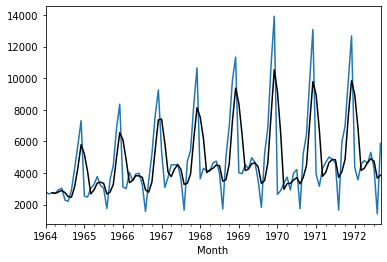

In [0]:
# Plotando os dados originais e os dados da média móvel:
df.plot()
rolling_media.plot(color='Black')
pyplot.show()

**Previsões com Média Móvel**

In [0]:
# Importando as bibliotecas:
from math import sqrt
from numpy import mean
from sklearn.metrics import mean_squared_error

O que faremos a seguir será o seguinte: A cada dois meses vamos calcular a média móvel e usar o valor encontrado para prever o valor do mês seguinte.

De forma resumida, vamos prever o valor do mês seguinte com base na média dos últimos 3 meses.

Exemplo: Para calcular o valor da venda do mês de Agosto vamos usar a média dos meses de Maio, junho e julho.

In [0]:
# Define uma janela de 2 elementos
window = 2

In [0]:
# Obtém os 2 primeiros valores da serie:
valores = [df.values[i] for i in range(window)]
print(valores)

[2815, 2672]


In [0]:
# Obtem todos os valores após os dois primeiros:
# range(2, tamanho_da_serie):

test = [df.values[i] for i in range(window, len(df.values))]

Como definimos que os 2 primeiros elementos serão usados para o treino o teste vai receber do terço até o último elemento.

In [0]:
# Imprime a variável test:
# 10 primeiros valores da série após o history
test[:10]


[2755, 2721, 2946, 3036, 2282, 2212, 2922, 4301, 5764, 7312]

In [0]:
# valores da Serie original:
df.values

array([ 2815,  2672,  2755,  2721,  2946,  3036,  2282,  2212,  2922,
        4301,  5764,  7312,  2541,  2475,  3031,  3266,  3776,  3230,
        3028,  1759,  3595,  4474,  6838,  8357,  3113,  3006,  4047,
        3523,  3937,  3986,  3260,  1573,  3528,  5211,  7614,  9254,
        5375,  3088,  3718,  4514,  4520,  4539,  3663,  1643,  4739,
        5428,  8314, 10651,  3633,  4292,  4154,  4121,  4647,  4753,
        3965,  1723,  5048,  6922,  9858, 11331,  4016,  3957,  4510,
        4276,  4968,  4677,  3523,  1821,  5222,  6872, 10803, 13916,
        2639,  2899,  3370,  3740,  2927,  3986,  4217,  1738,  5221,
        6424,  9842, 13076,  3934,  3162,  4286,  4676,  5010,  4874,
        4633,  1659,  5951,  6981,  9851, 12670,  4348,  3564,  4577,
        4788,  4618,  5312,  4298,  1413,  5877])

Os 2 primeiros elementos (da nossa lista array) foram armazenados na variável history e os demais valores foram armazenados na variável test.

Agora vamos criar uma maneira de sempre caminhar com o history para frente, alimentando ele, checando o seu tamanho e depois pegando os dois últimos valores.

Essa será a configuração para os 2 primeiros elementos.

In [0]:
# Obtém o tamanho da lista history:
length = len(valores)
print (length)

2


In [0]:
# Obtém o inicio da range:
print (length-window)

0


In [0]:
# Percorre history (2 ultimos elementos):
[valores[i] for i in range(length - window, length)]

[2815, 2672]

In [0]:
# Calcula a média do 2 últimos valores dos valores da serie original :
mean([valores[i] for i in range(length - window, length)])

2743.5

In [0]:
# atualiza a lista valores
# valor_real é o valor do terceiro mes
valor_real = 2755
valores.append(valor_real)

E esse processo vai se repetindo até o final dos dados, então vamos usar um loop para iterar por todos os dados de teste

**Previsão com Média Móvel - Janela deslizante**

In [0]:
# Define uma variavel chamada X que é a copia da serie de dados
X = df.values

# Define a variável window = 2 que será a janela de 2 valroes
window = 2

# Obtem os 2 primeiros valores da serie
valores = [X[i] for i in range(window)]

# Obtem todos os valores após os dois primeiros.
test = [X[i] for i in range(window, len(X))]

# cria lista de predições
predicoes = []

# percorre sobre os dados de teste...

for t in range(len(test)):
  # define a variavel length com o tamanho da variável valores
  length = len(valores)
  
  # define a variável valor_predito com a média dos 3 valores correntes..                                                           
  valor_predito = mean([valores[i] for i in range(length - window, length)])        
  
  # define a variável valor_real com o valor atual do teste..
  valor_real = test[t]                                                              
  
  # alimenta a lista de predicoes
  predicoes.append(valor_predito)                                                  
  
  # atualiza a lista history com os valores correntes..
  valores.append(valor_real)                                                        
  
  # imprime o valor predito e o real...
  print('Valor predito = %f, Valor real = %f' % (valor_predito, valor_real))

Valor predito = 2743.500000, Valor real = 2755.000000
Valor predito = 2713.500000, Valor real = 2721.000000
Valor predito = 2738.000000, Valor real = 2946.000000
Valor predito = 2833.500000, Valor real = 3036.000000
Valor predito = 2991.000000, Valor real = 2282.000000
Valor predito = 2659.000000, Valor real = 2212.000000
Valor predito = 2247.000000, Valor real = 2922.000000
Valor predito = 2567.000000, Valor real = 4301.000000
Valor predito = 3611.500000, Valor real = 5764.000000
Valor predito = 5032.500000, Valor real = 7312.000000
Valor predito = 6538.000000, Valor real = 2541.000000
Valor predito = 4926.500000, Valor real = 2475.000000
Valor predito = 2508.000000, Valor real = 3031.000000
Valor predito = 2753.000000, Valor real = 3266.000000
Valor predito = 3148.500000, Valor real = 3776.000000
Valor predito = 3521.000000, Valor real = 3230.000000
Valor predito = 3503.000000, Valor real = 3028.000000
Valor predito = 3129.000000, Valor real = 1759.000000
Valor predito = 2393.500000,

Esse é nosso modelo de média móvel que vai atualizando com o tempo.

Qual seria a nossa taxa de erro, ou seja, como nosso modelo está se saindo?

Utilizaremos o rmse para calcular essa taxa de erro

In [0]:
# Calcula a métrica de rmse:
rmse = sqrt(mean_squared_error(test, predicoes))
rmse

2847.414953510592

In [0]:
indices = [i for i in range(0, len(test))]
indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102]

**Fim**